<a href="https://colab.research.google.com/github/Tsyshnatiy/PerfUnitTests/blob/main/PerfUnitTestsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [217]:
def plot(path, tests):
  df = pd.read_csv(path)
  df.drop(df[df.name.str.endswith("_mean")].index, inplace = True)
  df.drop(df[df.name.str.endswith("_median")].index, inplace = True)
  df.drop(df[df.name.str.endswith("_stddev")].index, inplace = True)
  df.drop(df[df.name.str.endswith("_cv")].index, inplace = True)

  figure, axes = plt.subplots(len(tests), 1, sharex=True, figsize=(10,20))
  figure.suptitle('Performance')

  for i in range(0, len(tests)):
    series = df.loc[df.name == tests[i]]
    minimum = series.real_time.min()
    maximum = series.real_time.max()
    mean = series.real_time.mean()
    stddev = series.real_time.std()
    series.loc[:, "real_time"] -= mean
    # series.loc[:, "real_time"] /= maximum - minimum

    x = np.arange(1, series.shape[0] + 1)

    axes[i].set_title(f"{tests[i]} CV = {stddev / mean}")
    sns.barplot(ax=axes[i], data=series, x=x, y="real_time")

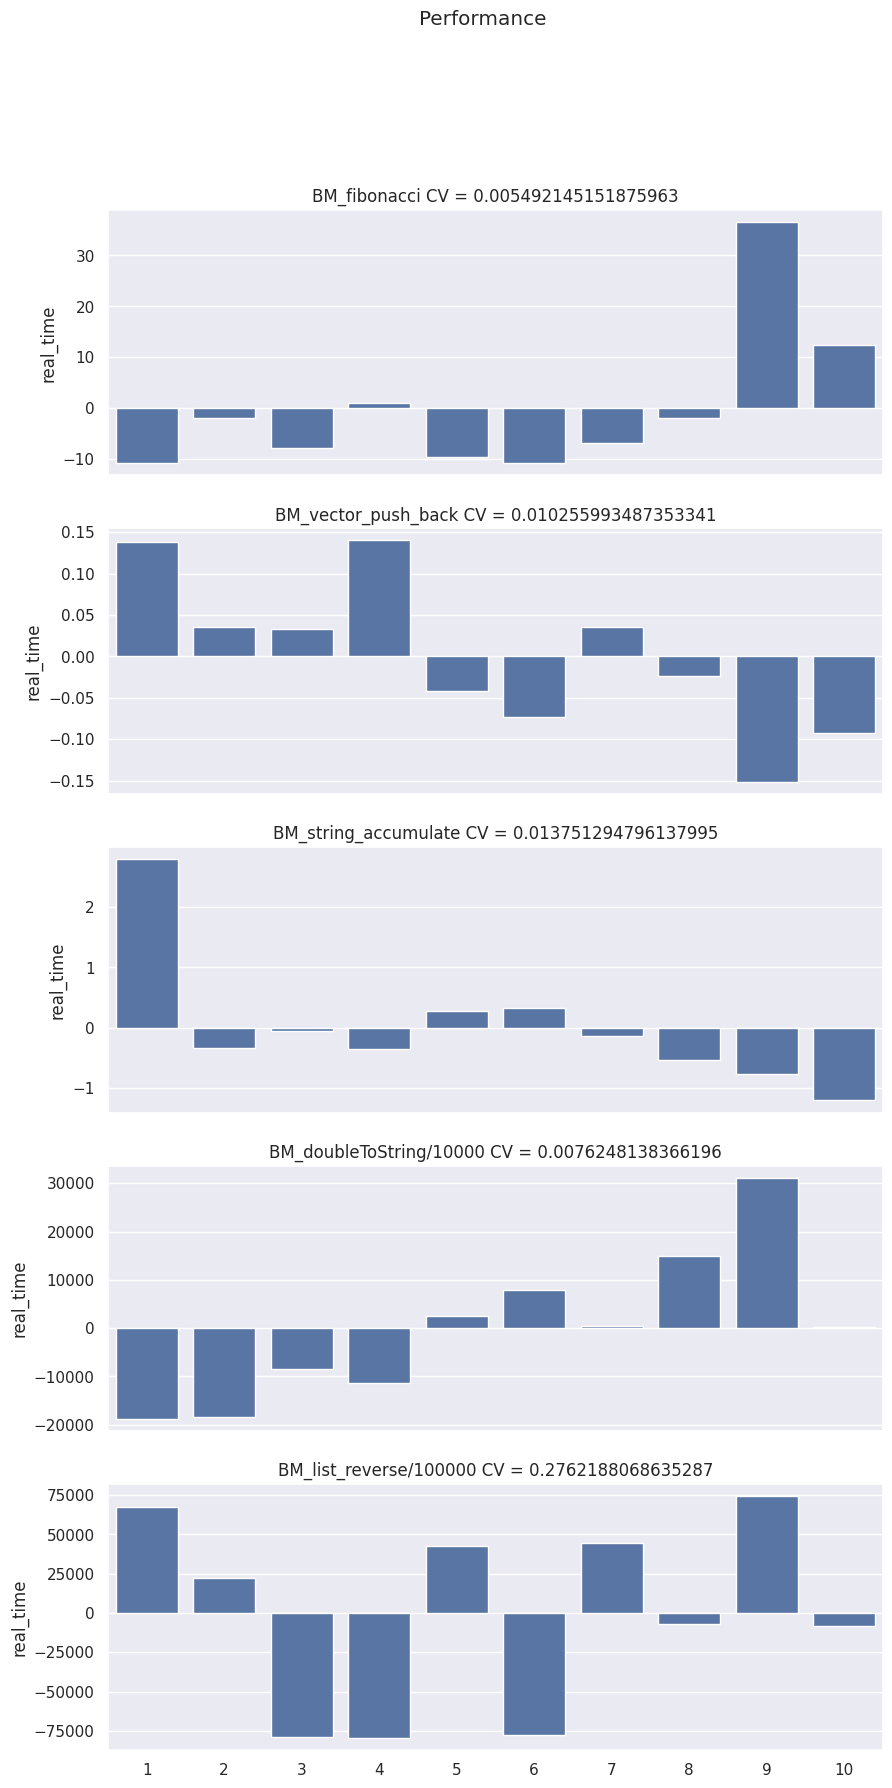

In [218]:
tests = ["BM_fibonacci",
         "BM_vector_push_back",
         "BM_string_accumulate",
         "BM_doubleToString/10000",
         "BM_list_reverse/100000"]
plot("sample_data/no_tuning.csv", tests)

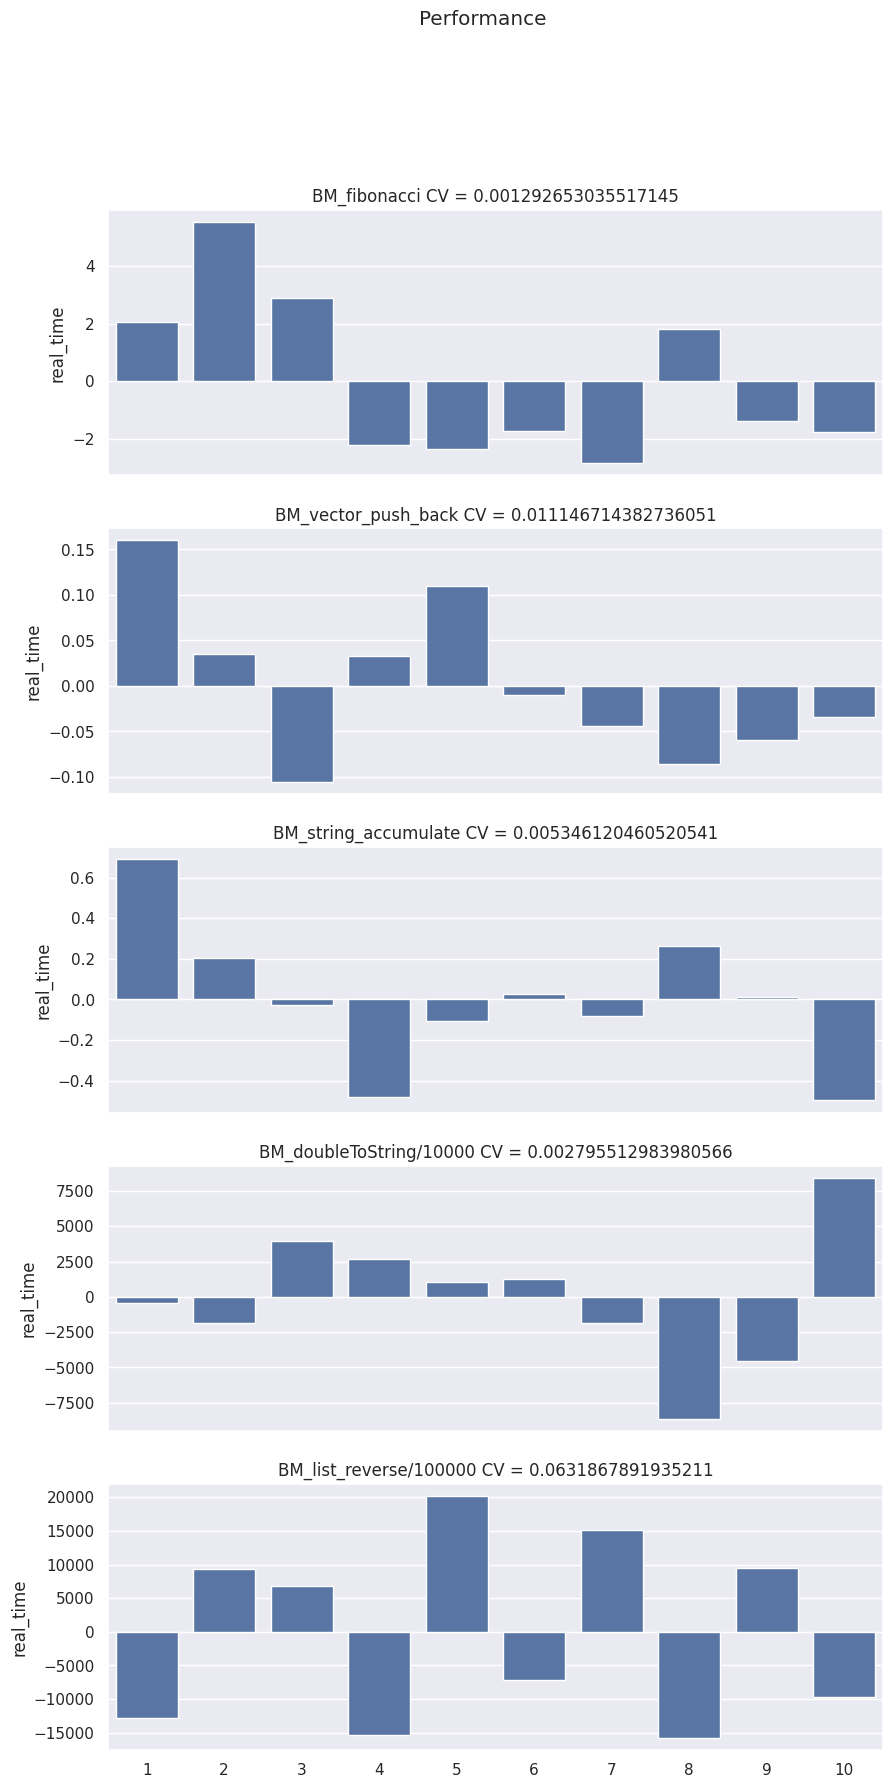

In [219]:
plot("sample_data/governor_performance.csv", tests)